In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
synth = fits.open("0_lwsynth_525.0.fits")[0].data
synth_conv = fits.open("0_lwsynth_525.0_convolved.fits")[0].data
cubeM = mio.MuramIntensity("", 0)

RMS for simulation: 0.23475882732567044
RMS for LW: 0.2080254852771759


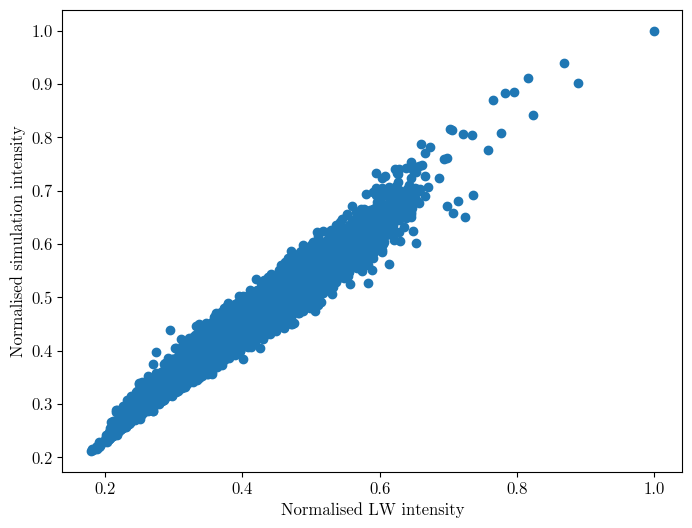

In [4]:
# Comparison of intensity taken from simulation and one that LW calculated
# Plotting normalized intensities + deriving RMS contrast
I1 = np.copy(synth[:,:,0,0])
I_M = cubeM[::2,::2]
I_M = I_M/np.max(I_M)
I1 = I1/np.max(I1)

fig = plt.figure(figsize = (8,6))
plt.scatter(I1,I_M)
plt.xlabel("Normalised LW intensity")
plt.ylabel("Normalised simulation intensity")
#plt.show()
plt.savefig("PoredjenjeInte.png", dpi = 300)

RMS_I1 = np.std(I1)/np.mean(I1)
print("RMS for simulation: {}".format(RMS_I1))

RMS_s = np.std(I_M)/np.mean(I_M)
print("RMS for LW: {}".format(RMS_s))

In [5]:
from astropy.io import fits
import sys
import os
from scipy.stats import pearsonr

In [6]:
filenames = []
for file in sorted(os.listdir (os.getcwd())):
	if file.startswith("tau_slice_1.000"):
		#print (file)
		filenames.append(file)
print ("How many files are in directory: {}".format(len(filenames)))

How many files are in directory: 2


In [7]:
T_array = []
Vx_array = []
Vy_array = []
I_continuum = []
cubeM_2 = mio.MuramIntensity("", 50)

In [8]:
data_full1 = np.fromfile("tau_slice_1.000.000000", dtype="float32")
data1 = data_full1[4:].reshape(11, 1536, 1536)

data_full2 = np.fromfile("tau_slice_1.000.000050", dtype="float32")
data2 = data_full2[4:].reshape(11, 1536, 1536)

T_1 = data1[8,:,:]
T_2 = data2[8,:,:]

In [9]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 1200.0 / 1.665 / pixelsize

In [10]:
T_1.shape

(1536, 1536)

In [11]:
cubeM.shape

(1536, 1536)

In [12]:
Temp1 = T_1**4
Temp2 = T_2**4

In [13]:
# Calculating and plotting correlation between T^4 and I
r_pre_obrade = pearsonr(cubeM.flatten(), Temp1.flatten())
print(r_pre_obrade)

PearsonRResult(statistic=0.016994910154023383, pvalue=3.1122080596324443e-150)


In [14]:
r_pre_obrade50 = pearsonr(cubeM_2.flatten(), Temp2.flatten())
print(r_pre_obrade50)

PearsonRResult(statistic=0.014911367286913148, pvalue=4.13104429136706e-116)


In [19]:
r_T = pearsonr(cubeM_2.flatten(), T_2.flatten())
print(r_T)

PearsonRResult(statistic=0.014915297288886704, pvalue=3.596496136783558e-116)


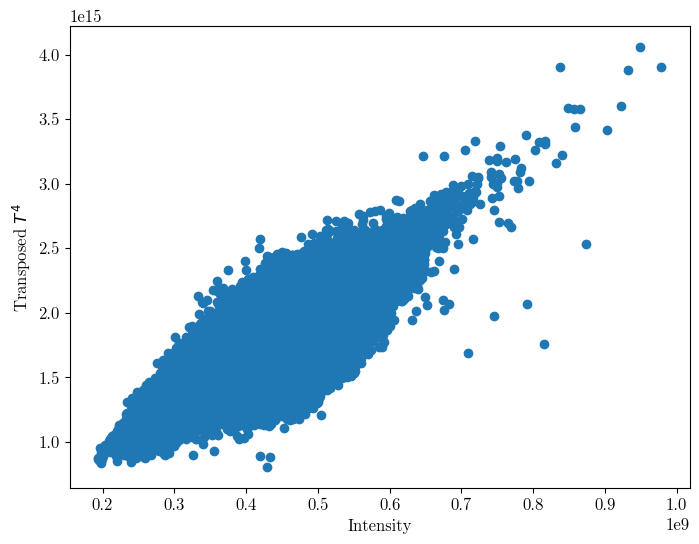

In [22]:
fig = plt.figure(figsize = (8,6))
plt.scatter(cubeM, Temp1.T)
plt.xlabel("Intensity")
plt.ylabel("Transposed $T^4$")
#plt.show()
plt.savefig("TempInte.png", dpi = 300)
